In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('heart.csv.xls')  # loaded the dataset


In [3]:
data.isnull().sum()  # checking for null values


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

duplicate values

In [4]:
data_dup = data.duplicated().any()  # checking for dup values


In [5]:
data_dup


True

In [6]:
data = data.drop_duplicates()  # dropping those values


In [7]:
data_dup = data.duplicated().any()


In [8]:
data_dup


False

Data Processing

In [9]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)


In [10]:
cate_val  # categorical data


['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [11]:
cont_val  # numerical data


['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

Encoding Categorical Data

In [12]:
cate_val


['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [13]:
data['cp'].unique()


array([3, 2, 1, 0], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('output')
data = pd.get_dummies(data, columns=cate_val, drop_first=True)


In [15]:
data.head()


,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


7. Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])


In [18]:
data.head()


,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


8. Splitting The Dataset Into The Training Set And Test Set

In [19]:
X = data.drop('output', axis=1)  # for input


In [20]:
y = data['output']  # this for output


In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  # 80:20 ratio
                                                    random_state=42)


In [23]:
y_test


180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: output, Length: 61, dtype: int64

9. Logistic Regression

In [24]:
data.head()


,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [25]:
from sklearn.linear_model import LogisticRegression


In [26]:
log = LogisticRegression()
log.fit(X_train, y_train)


LogisticRegression()

In [27]:
y_pred1 = log.predict(X_test)
y_pred1


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score


In [29]:
accuracy_score(y_test, y_pred1)


0.9016393442622951

10. SVC

In [30]:
from sklearn import svm  # support vector model
svm = svm.SVC()
svm.fit(X_train, y_train)


SVC()

In [31]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test, y_pred2)


0.8688524590163934

11. KNeighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [33]:
y_pred3 = knn.predict(X_test)
accuracy_score(y_test, y_pred3)


0.8688524590163934

In [34]:
score = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))


In [35]:
score


[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [36]:
import matplotlib.pyplot as plt


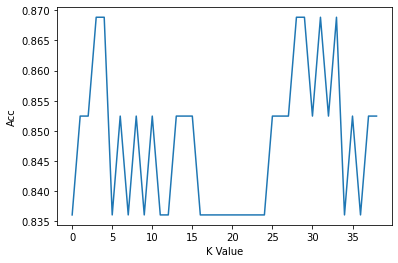

In [37]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()


In [38]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)


0.8524590163934426

Non-Linear ML Algorithms

In [39]:
data = pd.read_csv('heart.csv.xls')


In [40]:
data = data.drop_duplicates()


In [41]:
X = data.drop('output', axis=1)
y = data['output']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)


12. Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
dt = DecisionTreeClassifier()


In [45]:
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [46]:
y_pred4 = dt.predict(X_test)


In [47]:
accuracy_score(y_test, y_pred4)


0.8032786885245902

13. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [49]:
y_pred5 = rf.predict(X_test)
accuracy_score(y_test, y_pred5)


0.8688524590163934

14. Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


GradientBoostingClassifier()

In [51]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test, y_pred6)


0.8524590163934426

In [52]:
final_data = pd.DataFrame({'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
                          'ACC': [accuracy_score(y_test, y_pred1)*100,
                                  accuracy_score(y_test, y_pred2)*100,
                                  accuracy_score(y_test, y_pred3)*100,
                                  accuracy_score(y_test, y_pred4)*100,
                                  accuracy_score(y_test, y_pred5)*100,
                                  accuracy_score(y_test, y_pred6)*100]})


In [53]:
final_data  # comparing the accuracy of all the models used


,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246
3,DT,80.327869
4,RF,86.885246
5,GB,85.245902


c:\bennett\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

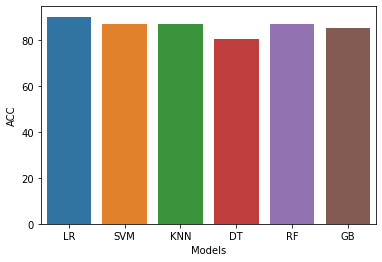

In [54]:
import seaborn as sns
sns.barplot(final_data['Models'], final_data['ACC'])


In [55]:
from sklearn.ensemble import RandomForestClassifier
X = data.drop('output', axis=1)
y = data['output']


rf = RandomForestClassifier()
rf.fit(X, y)


RandomForestClassifier()

15. Prediction on New Data

In [56]:
import pandas as pd
new_data = pd.DataFrame({
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal': 3,
}, index=[0])
new_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [57]:
p = rf.predict(new_data)
if p[0] == 0:
    print("No Disease")
else:
    print("Disease")


No Disease


16. Save Model Using Joblib

In [58]:
import joblib
# saving the trained model, so we dont have to retrain the model every time we give new data
joblib.dump(rf, 'model_joblib_heart')


['model_joblib_heart']

In [59]:
model = joblib.load('model_joblib_heart')  # importing the trained mode
model.predict(new_data)


array([0], dtype=int64)

In [60]:
data.tail()   # last 5 values


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


GUI

In [61]:
import os
import matplotlib as mpl
if os.environ.get('DISPLAY', '') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt


no display found. Using non-interactive Agg backend


In [65]:
from tkinter import *
import joblib


def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    model = joblib.load('model_joblib_heart')
    result = model.predict(
        [[p1, p2, p3, p4, p5, p6, p7, p8, p8, p10, p11, p12, p13]])

    if result == 0:
        Label(master, text=" Congratulations No Heart Diseases ").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Diseases").grid(row=31)


master = Tk()
master.title("Heart Failure Prediction System")
#master['background']='yellow'


master.resizable(False,False)
label = Label(master, text="Heart Failure Prediction System", bg="Red", font=('times new roman', 15, 'bold'),fg="black").grid(row=0, columnspan=2)


Label(master, text="Enter Your Age",font=('comicsanmas', 10, 'bold' )).grid(row=1)
Label(master, text="Male Or Female [1/0]",font=('comicsanmas', 10, 'bold')).grid(row=2)
Label(master, text="Enter Value of Constrictive pericarditis",font=('comicsanmas', 10, 'bold')).grid(row=3)
Label(master, text="Enter Value of restingbps",font=('comicsanmas', 10, 'bold')).grid(row=4)
Label(master, text="Enter Value of cholestrol",font=('comicsanmas', 10, 'bold')).grid(row=5)
Label(master, text="Enter Value of fasting blood sugar",font=('comicsanmas', 10, 'bold')).grid(row=6)
Label(master, text="Enter Value of restecg",font=('comicsanmas', 10, 'bold')).grid(row=7)
Label(master, text="Enter Value of thalach",font=('comicsanmas', 10, 'bold')).grid(row=8)
Label(master, text="Enter Value of exang",font=('comicsanmas', 10, 'bold')).grid(row=9)
Label(master, text="Enter Value of oldpeak",font=('comicsanmas', 10, 'bold')).grid(row=10)
Label(master, text="Enter Value of slope",font=('comicsanmas', 10, 'bold')).grid(row=11)
Label(master, text="Enter Value of coronary artirey",font=('comicsanmas', 10, 'bold')).grid(row=12)
Label(master, text="Enter Value of thalassemia",font=('comicsanmas', 10, 'bold')).grid(row=13)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)


Button(master, text='Predict', bg='Red', command=show_entry_fields).grid()

mainloop()
